## Load Test Data ##

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import files

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# 2. Get the file
downloaded = drive.CreateFile({'id':'1bKD8IT-I3JyMUzXfViVMfgYXAcXgJYRy'}) # replace the id with id of file you want to access
downloaded.GetContentFile('image_.zip')

In [0]:
!mkdir checkpoint

In [0]:
# downloaded = drive.CreateFile({'id':'10PphrHSK-R4zZfN1tYKObb1DYUTtS5io'}) # replace the id with id of file you want to access
# downloaded.GetContentFile('./checkpoint/ckpt.t7')

## Zip Extraction ##

In [0]:
import zipfile
import os, os.path

In [0]:
ImagePath = './Image'

In [0]:
objZip = zipfile.ZipFile('./image_.zip')
objZip.extractall(ImagePath)

In [0]:
from IPython.display import Image

In [9]:
Image('./Image/train10/00356.jpeg')

## Install Pytorch 4.0 ##

In [10]:
# torch 0.4 install for torch.no_grad()
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

# !pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl
# !pip3 install torchvision

tcmalloc: large alloc 1073750016 bytes == 0x5c69a000 @  0x7f2daa0742a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
0.4.0
True


## Make pandas data ##

### Train Data ###

In [0]:
import os, sys

In [0]:
TRAIN_DATA_PATH = "./Image/train/"
VALID_DATA_PATH = "./Image/validate/"
TEST_DATA_PATH  = "./Image/test/"

TRAIN10_DATA_PATH  = "./Image/train10/"

In [0]:
train_dirs = os.listdir(TRAIN_DATA_PATH)

In [0]:
import pandas as pd

In [0]:
pd_train_data = pd.DataFrame(train_dirs, columns=["filename"])

In [6]:
pd_train_data.head()

,filename
0,360566.jpeg
1,02550.jpeg
2,446035.jpeg
3,34534.jpeg
4,30020.jpeg


In [0]:
pd_train_data["output"] = pd_train_data["filename"].str.extract('([0-9]+)', expand=False)

In [8]:
pd_train_data.head()

,filename,output
0,360566.jpeg,360566
1,02550.jpeg,02550
2,446035.jpeg,446035
3,34534.jpeg,34534
4,30020.jpeg,30020


In [0]:
pd_train_data["output0"] =  pd.to_numeric( pd_train_data["output"].str[0], downcast='integer')
pd_train_data["output1"] =  pd.to_numeric( pd_train_data["output"].str[1], downcast='integer')
pd_train_data["output2"] =  pd.to_numeric( pd_train_data["output"].str[2], downcast='integer')
pd_train_data["output3"] =  pd.to_numeric( pd_train_data["output"].str[3], downcast='integer')
pd_train_data["output4"] =  pd.to_numeric( pd_train_data["output"].str[4], downcast='integer')
pd_train_data["output5"] =  pd.to_numeric( pd_train_data["output"].str[5], downcast='integer')

In [10]:
pd_train_data.head()

,filename,output,output0,output1,output2,output3,output4,output5
0,360566.jpeg,360566,3,6,0,5,6,6.0
1,02550.jpeg,02550,0,2,5,5,0,NaN
2,446035.jpeg,446035,4,4,6,0,3,5.0
3,34534.jpeg,34534,3,4,5,3,4,NaN
4,30020.jpeg,30020,3,0,0,2,0,NaN


In [0]:
pd_train_data = pd_train_data.fillna(0)

In [12]:
pd_train_data.head()

,filename,output,output0,output1,output2,output3,output4,output5
0,360566.jpeg,360566,3,6,0,5,6,6.0
1,02550.jpeg,02550,0,2,5,5,0,0.0
2,446035.jpeg,446035,4,4,6,0,3,5.0
3,34534.jpeg,34534,3,4,5,3,4,0.0
4,30020.jpeg,30020,3,0,0,2,0,0.0


### Valid Data ###

In [0]:
valid_dirs = os.listdir(VALID_DATA_PATH)

In [0]:
import pandas as pd

In [0]:
pd_valid_data = pd.DataFrame(valid_dirs, columns=["filename"])

In [16]:
pd_valid_data.head()

,filename
0,99239.jpeg
1,43495.jpeg
2,830364.jpeg
3,06959.jpeg
4,942283.jpeg


In [0]:
pd_valid_data["output"] = pd_valid_data["filename"].str.extract('([0-9]+)', expand=False)

In [18]:
pd_valid_data.head()

,filename,output
0,99239.jpeg,99239
1,43495.jpeg,43495
2,830364.jpeg,830364
3,06959.jpeg,06959
4,942283.jpeg,942283


In [0]:
pd_valid_data["output0"] =  pd.to_numeric( pd_valid_data["output"].str[0], downcast='integer')
pd_valid_data["output1"] =  pd.to_numeric( pd_valid_data["output"].str[1], downcast='integer')
pd_valid_data["output2"] =  pd.to_numeric( pd_valid_data["output"].str[2], downcast='integer')
pd_valid_data["output3"] =  pd.to_numeric( pd_valid_data["output"].str[3], downcast='integer')
pd_valid_data["output4"] =  pd.to_numeric( pd_valid_data["output"].str[4], downcast='integer')
pd_valid_data["output5"] =  pd.to_numeric( pd_valid_data["output"].str[5], downcast='integer')

In [20]:
pd_valid_data.head()

,filename,output,output0,output1,output2,output3,output4,output5
0,99239.jpeg,99239,9,9,2,3,9,NaN
1,43495.jpeg,43495,4,3,4,9,5,NaN
2,830364.jpeg,830364,8,3,0,3,6,4.0
3,06959.jpeg,06959,0,6,9,5,9,NaN
4,942283.jpeg,942283,9,4,2,2,8,3.0


In [0]:
pd_valid_data = pd_valid_data.fillna(0)

In [22]:
pd_valid_data.head()

,filename,output,output0,output1,output2,output3,output4,output5
0,99239.jpeg,99239,9,9,2,3,9,0.0
1,43495.jpeg,43495,4,3,4,9,5,0.0
2,830364.jpeg,830364,8,3,0,3,6,4.0
3,06959.jpeg,06959,0,6,9,5,9,0.0
4,942283.jpeg,942283,9,4,2,2,8,3.0


## Image Load using PILOW ##

In [0]:
from PIL import Image

def pil_loader(path):
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, 'rb') as f:
        img = Image.open(f)
        # return img.convert('RGB') # RGB
        return img.convert('L') # Gray
        # return img.convert('1') # binary


def accimage_loader(path):
    import accimage
    try:
        return accimage.Image(path)
    except IOError:
        # Potentially a decoding problem, fall back to PIL.Image
        return pil_loader(path)


def default_loader(path):
    from torchvision import get_image_backend
    if get_image_backend() == 'accimage':
        return accimage_loader(path)
    else:
        return pil_loader(path)

In [0]:
image = default_loader("./Image/train/00345.jpeg")

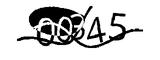

In [25]:
image

## PreProcess Image Data ##

In [0]:
import numpy as np
import torch

import collections

try:
    import accimage
except ImportError:
    accimage = None
    
def _is_pil_image(img):
    if accimage is not None:
        return isinstance(img, (Image.Image, accimage.Image))
    else:
        return isinstance(img, Image.Image)


def _is_tensor_image(img):
    return torch.is_tensor(img) and img.ndimension() == 3


def _is_numpy_image(img):
    return isinstance(img, np.ndarray) and (img.ndim in {2, 3})

def to_tensor(pic):
    """Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor.
    See ``ToTensor`` for more details.
    Args:
        pic (PIL Image or numpy.ndarray): Image to be converted to tensor.
    Returns:
        Tensor: Converted image.
    """
    if not(_is_pil_image(pic) or _is_numpy_image(pic)):
        raise TypeError('pic should be PIL Image or ndarray. Got {}'.format(type(pic)))

    if isinstance(pic, np.ndarray):
        # handle numpy array
        img = torch.from_numpy(pic.transpose((2, 0, 1)))
        # backward compatibility
        if isinstance(img, torch.ByteTensor):
            return img.float().div(255)
        else:
            return img

    if accimage is not None and isinstance(pic, accimage.Image):
        nppic = np.zeros([pic.channels, pic.height, pic.width], dtype=np.float32)
        pic.copyto(nppic)
        return torch.from_numpy(nppic)

    # handle PIL Image
    if pic.mode == 'I':
        img = torch.from_numpy(np.array(pic, np.int32, copy=False))
    elif pic.mode == 'I;16':
        img = torch.from_numpy(np.array(pic, np.int16, copy=False))
    elif pic.mode == 'F':
        img = torch.from_numpy(np.array(pic, np.float32, copy=False))
    elif pic.mode == '1':
        img = 255 * torch.from_numpy(np.array(pic, np.uint8, copy=False))
    else:
        img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
    # PIL image mode: L, P, I, F, RGB, YCbCr, RGBA, CMYK
    if pic.mode == 'YCbCr':
        nchannel = 3
    elif pic.mode == 'I;16':
        nchannel = 1
    else:
        nchannel = len(pic.mode)
    img = img.view(pic.size[1], pic.size[0], nchannel)
    # put it from HWC to CHW format
    # yikes, this transpose takes 80% of the loading time/CPU
    img = img.transpose(0, 1).transpose(0, 2).contiguous()
    if isinstance(img, torch.ByteTensor):
        return img.float().div(255)
    else:
        return img

In [0]:
image_tensor = to_tensor(image)

In [28]:
image_tensor.type()

'torch.FloatTensor'

In [29]:
image_tensor.size()

torch.Size([1, 60, 160])

## Design Dataset ##

In [0]:
import torch
from torch.utils.data import Dataset, DataLoader

In [0]:
class CapCharDataSet(Dataset):
    
    def __init__(self, data):
        self.input_data = []
        self.target_data = []
        
        # Load All Data
        print("image data loading...")
        for index, row in data.iterrows():
            filename = data_root + row['filename']
            image = default_loader(filename)
            image_tensor = to_tensor(image)
            self.input_data.append(image_tensor)
             
            target_tensor = torch.tensor([[ int(row['output0']), int(row['output1']), int(row['output2']),  
                                            int(row['output3']), int(row['output4']), int(row['output5']) ]])             
            self.target_data.append(target_tensor)
        
        print("[{}] data is loaded!".format(len(self.input_data)))
        
    def __getitem__(self, index):
        return self.input_data[index], self.target_data[index]
                                          
    def __len__(self):
        return len(self.input_data)

In [32]:
data_root = TRAIN_DATA_PATH
train_dataset = CapCharDataSet(pd_train_data)
train_loader = DataLoader(dataset=train_dataset, batch_size=20, shuffle=True)

image data loading...
[10000] data is loaded!


In [33]:
data_root = VALID_DATA_PATH
valid_dataset = CapCharDataSet(pd_valid_data)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=20, shuffle=False)

image data loading...
[4356] data is loaded!


## Design Model ##

In [0]:
import numpy as np
import torch
import torch.nn.functional as F

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        ## input 1*60*160
        self.conv1 = torch.nn.Conv2d( 1, 48, kernel_size=5)
        self.mp1 = torch.nn.MaxPool2d((2,2), stride=(2, 2))
        
        self.conv2 = torch.nn.Conv2d(48, 64, kernel_size=5)        
        self.mp2 = torch.nn.MaxPool2d((2,1), stride=(2, 1))
        
        self.conv3 = torch.nn.Conv2d(64, 128, kernel_size=3)        
        self.mp3 = torch.nn.MaxPool2d((2,2), stride=(2, 2))
        
        self.conv4 = torch.nn.Conv2d(128, 256, kernel_size=4)        
        self.mp4 = torch.nn.MaxPool2d((2,2), stride=(2, 2))
        
        self.fc1 = torch.nn.Linear(4096, 3072)
        self.fc2 = torch.nn.Linear(3072, 3072)
        
        self.fcO1 = torch.nn.Linear(3072, 10)
        self.fcO2 = torch.nn.Linear(3072, 10)
        self.fcO3 = torch.nn.Linear(3072, 10)
        self.fcO4 = torch.nn.Linear(3072, 10)
        self.fcO5 = torch.nn.Linear(3072, 10)
        self.fcO6 = torch.nn.Linear(3072, 10)
        
    def forward(self, x):
        in_size = x.size(0)
        
        x = F.relu(self.mp1(self.conv1(x)))
        x = F.relu(self.mp2(self.conv2(x)))
        x = F.relu(self.mp3(self.conv3(x)))
        x = F.relu(self.mp4(self.conv4(x)))
        
        x = x.view(in_size, -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
      
        x1 = F.log_softmax(self.fcO1(x))
        x2 = F.log_softmax(self.fcO2(x))
        x3 = F.log_softmax(self.fcO3(x))
        x4 = F.log_softmax(self.fcO4(x))
        x5 = F.log_softmax(self.fcO5(x))
        x6 = F.log_softmax(self.fcO6(x))
        
        return x1, x2, x3, x4, x5, x6
        # return output # F.log_softmax(x)

In [0]:
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

In [0]:
model = Model()
model = model.to(device)

In [0]:
import pandas as pd
import os, os.path

#@title Resume 여부
resume = False #@param {type:"boolean"}

# 그래프를 위하여 pandas에 accuracy와 loss를 저장한다.
train_acc_collect = []
valid_acc_collect = []

train_loss_collect = []
valid_loss_collect = []

if resume:
    # Load checkpoint.
    print('==> Resuming from checkpoint..')
    assert os.path.isdir('checkpoint'), 'Error: no checkpoint directory found!'
    checkpoint = torch.load('./checkpoint/ckpt.t7')
    model.load_state_dict(checkpoint['net'])
    best_acc = checkpoint['acc']
    start_epoch = checkpoint['epoch']
    best_epoch = start_epoch
    print('==> best_epoch : ', best_epoch)
    print('==> best_acc : ', best_acc)
    
    ## Load Train Stat
    # train_stat = pd.read_csv("./checkpoint/test_stat.csv")
    # train_acc_collect = train_stat['TrainAccRate'].tolist()
    # valid_acc_collect = train_stat['ValidAccRate'].tolist()
    # train_loss_collect = train_stat['TrainLoss'].tolist()
    # valid_loss_collect = train_stat['ValidLoss'].tolist()
    
    print('==> Done..')
else:
    # train_stat = pd.DataFrame()
    start_epoch = 0
    best_acc = 0
    best_epoch = 0

## Define criterion & optimizer ##

In [0]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.00003, weight_decay=1e-5 )

## Train ##

In [0]:
def calc_correct(pred_all, answer): 
  
  equality = pred_all.eq(answer)
  
  sum_correct = ( equality.sum(1) == len(answer[0]) ).sum()
    
  return sum_correct

# calc_correct(a, b, 10.0)

In [0]:
def train(epoch):
    model.train()
    
    correct = 0.0
    total = 0.0
    
    total_loss = 0.0
    train_loss = 0
    
    for batch_idx, (data, target) in  enumerate(train_loader):
    
        data, target = data.to(device), target.to(device)
        
        # init optimizer
        optimizer.zero_grad()

        # Go Forward
        # target_pred = model(data)
        out1, out2, out3, out4, out5, out6 = model(data)

        # Calc loss
        target = target.view(-1, 6)
                
        loss1 = F.nll_loss(out1, target[:,0], size_average=False)
        loss2 = F.nll_loss(out2, target[:,1], size_average=False)
        loss3 = F.nll_loss(out3, target[:,2], size_average=False)
        loss4 = F.nll_loss(out4, target[:,3], size_average=False)
        loss5 = F.nll_loss(out5, target[:,4], size_average=False)
        loss6 = F.nll_loss(out6, target[:,5], size_average=False)
        # print("loss1 : ", loss1)
        # print("loss2 : ", loss2)
        # print("loss3 : ", loss3)
        # print("loss4 : ", loss4)
        # print("loss5 : ", loss5)
        # print("loss6 : ", loss6)
        
        loss = loss1 + loss2 + loss3 + loss4 + loss5 + loss6

        pred_1 = out1.data.max(1, keepdim=True)[1]
        pred_2 = out2.data.max(1, keepdim=True)[1]
        pred_3 = out3.data.max(1, keepdim=True)[1]
        pred_4 = out4.data.max(1, keepdim=True)[1]
        pred_5 = out5.data.max(1, keepdim=True)[1]
        pred_6 = out6.data.max(1, keepdim=True)[1]
                
        pred_all = torch.cat([pred_1,pred_2, pred_3, pred_4, pred_5, pred_6],1)
        # print("pred_all", pred_all)
        # print("target", target)
        
        # Calc Acc (loss < 10.0)      
        correct += calc_correct(pred_all, target)
        # correct += ((abs(target_pred - target)<3.0).sum(1)==8.0).sum()
        # correct += (abs(target_pred - target).sum(1)<10.0).sum()
        # correct = (float)(correct.item())
        total  += len(target)
          
        # loss backward
        loss.backward()

        # update weight
        optimizer.step()

        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f} ({:.0f}/{:.0f})'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item(), correct, total))
        
        total_loss += loss.item()
    print("")
    print(epoch, total_loss)
    print("")
    
    # Save checkpoint.
    acc = 100.0*(correct)/(total)
    print("acc = ", acc)
      
    # Save Train Statistics
    epoch_acc = correct/total
    epoch_loss = total_loss/(batch_idx+1)
    train_acc_collect.append(epoch_acc)
    train_loss_collect.append(epoch_loss)
      


In [0]:
def test(epoch):
    
    global best_acc
    global best_epoch
    
    correct = 0.0
    total = 0.0
    
    with torch.no_grad():

      model.eval()

      total_loss = 0.0
      for batch_idx, (data, target) in  enumerate(valid_loader):

          data, target = data.to(device), target.to(device)
        
          # init optimizer
          optimizer.zero_grad()

          # Go Forward
          # target_pred = model(data)
          out1, out2, out3, out4, out5, out6 = model(data)

          # Calc loss
          target = target.view(-1, 6)

          loss1 = F.nll_loss(out1, target[:,0], size_average=False)
          loss2 = F.nll_loss(out2, target[:,1], size_average=False)
          loss3 = F.nll_loss(out3, target[:,2], size_average=False)
          loss4 = F.nll_loss(out4, target[:,3], size_average=False)
          loss5 = F.nll_loss(out5, target[:,4], size_average=False)
          loss6 = F.nll_loss(out6, target[:,5], size_average=False)
          # print("loss1 : ", loss1)
          # print("loss2 : ", loss2)
          # print("loss3 : ", loss3)
          # print("loss4 : ", loss4)
          # print("loss5 : ", loss5)
          # print("loss6 : ", loss6)

          loss = loss1 + loss2 + loss3 + loss4 + loss5 + loss6

          pred_1 = out1.data.max(1, keepdim=True)[1]
          pred_2 = out2.data.max(1, keepdim=True)[1]
          pred_3 = out3.data.max(1, keepdim=True)[1]
          pred_4 = out4.data.max(1, keepdim=True)[1]
          pred_5 = out5.data.max(1, keepdim=True)[1]
          pred_6 = out6.data.max(1, keepdim=True)[1]

          pred_all = torch.cat([pred_1,pred_2, pred_3, pred_4, pred_5, pred_6],1)
          # print("pred_all", pred_all)
          # print("target", target)

          # Calc Acc (loss < 10.0)      
          correct += (float)(calc_correct(pred_all, target))
          # correct += ((abs(target_pred - target)<3.0).sum(1)==8.0).sum()
          # correct += (abs(target_pred - target).sum(1)<10.0).sum()
          # correct = (float)(correct.item())
          total  += len(target)

          if batch_idx % 10 == 0:
              print('Test Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f} ({:.0f}/{:.0f})'.format(
                  epoch, batch_idx * len(data), len(valid_loader.dataset),
                  100. * batch_idx / len(valid_loader), loss.item(), correct, total))

          total_loss += loss.item()
      print("")
      print(epoch, total_loss)
      print("")
      
    
      # Save checkpoint.
      acc = 100.0*(correct)/(total)
      print("acc = ", acc)
      if acc > best_acc:
          print('\nSaving.. = [%d, %.3f]\n'% (epoch, acc))
          state = {
              'net': model.state_dict(),
              'acc': acc,
              'epoch': epoch,
          }
          if not os.path.isdir('checkpoint'):
              os.mkdir('checkpoint')
          torch.save(state, './checkpoint/ckpt.t7')
          best_acc = acc
          best_epoch = epoch
      
      
      # Save Eval Statistics
      epoch_acc = correct/total
      epoch_loss = total_loss/(batch_idx+1)
      valid_acc_collect.append(epoch_acc)
      valid_loss_collect.append(epoch_loss)

In [53]:
for epoch in range(start_epoch, start_epoch+20):
    train(epoch)
    test(epoch)
    start_epoch = epoch

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_l

Train Epoch: 71 [0/10000 (0%)]	Loss: 0.000000 (20/20)
Train Epoch: 71 [200/10000 (2%)]	Loss: 0.000000 (220/220)
Train Epoch: 71 [400/10000 (4%)]	Loss: 0.000003 (420/420)
Train Epoch: 71 [600/10000 (6%)]	Loss: 0.000000 (620/620)
Train Epoch: 71 [800/10000 (8%)]	Loss: 0.000003 (820/820)
Train Epoch: 71 [1000/10000 (10%)]	Loss: 0.000027 (1020/1020)
Train Epoch: 71 [1200/10000 (12%)]	Loss: 0.000006 (1220/1220)
Train Epoch: 71 [1400/10000 (14%)]	Loss: 0.000002 (1420/1420)
Train Epoch: 71 [1600/10000 (16%)]	Loss: 0.000000 (1620/1620)
Train Epoch: 71 [1800/10000 (18%)]	Loss: 0.000008 (1820/1820)
Train Epoch: 71 [2000/10000 (20%)]	Loss: 0.000005 (2020/2020)
Train Epoch: 71 [2200/10000 (22%)]	Loss: 0.000000 (2220/2220)
Train Epoch: 71 [2400/10000 (24%)]	Loss: 0.000002 (2420/2420)
Train Epoch: 71 [2600/10000 (26%)]	Loss: 0.000002 (2620/2620)
Train Epoch: 71 [2800/10000 (28%)]	Loss: 0.000002 (2820/2820)
Train Epoch: 71 [3000/10000 (30%)]	Loss: 0.000002 (3020/3020)
Train Epoch: 71 [3200/10000 (32%

In [54]:
#@title 학습 데이터 저장
save_learn_data = True #@param {type:"boolean"}

if save_learn_data == True:
  
  from pydrive.auth import GoogleAuth
  from pydrive.drive import GoogleDrive
  from google.colab import auth
  from oauth2client.client import GoogleCredentials
  from google.colab import files

  # 1. Authenticate and create the PyDrive client.
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  # Text file.
  file = drive.CreateFile({'parents':[{u'id':'1BLb9XdJS8WuMLyVipEi-XuDNNYFgxPeF'}]})
  file.SetContentFile('./checkpoint/ckpt.t7')  # VM에 저장되어 있는  example.txt 파일을 업로드
  file.Upload()
  print('Uploaded file with ID {}'.format(file.get('id')))

Uploaded file with ID 1G_bjkdnExlbOoYqOW90oCSpg8IdVvZuG


## Validation ##

In [0]:
test_dirs = os.listdir(TEST_DATA_PATH) 

In [0]:
import pandas as pd

In [0]:
pd_test_data = pd.DataFrame(test_dirs, columns=["filename"])

In [129]:
pd_test_data.tail()

,filename
103,22990.jpeg
104,64268.jpeg
105,00493.jpeg
106,64088.jpeg
107,64066.jpeg


In [0]:
pd_test_data["output"] = pd_test_data["filename"].str.extract('([0-9]+)', expand=False)

In [131]:
pd_test_data.head()

,filename,output
0,43453.jpeg,43453
1,00424.jpeg,00424
2,43432.jpeg,43432
3,54826.jpeg,54826
4,00422.jpeg,00422


In [0]:
pd_test_data["output0"] = pd_test_data["output"] + "0" 

In [134]:
pd_test_data.head()

,filename,output,output0
0,43453.jpeg,43453,434530
1,00424.jpeg,00424,004240
2,43432.jpeg,43432,434320
3,54826.jpeg,54826,548260
4,00422.jpeg,00422,004220


In [0]:
test_index = 0

In [0]:
image = default_loader(TEST_DATA_PATH+pd_test_data['filename'][test_index])

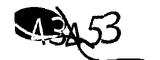

In [137]:
image

In [0]:
image_tensor = to_tensor(image)

In [0]:
image_tensors = image_tensor.unsqueeze(0).to(device)

In [140]:
# do forward
result = model(image_tensors)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_l

In [141]:
result

(tensor([[-41.9463, -40.1143, -48.4192, -40.9898,   0.0000, -59.4636,
          -50.4026, -40.1143, -36.1130, -65.6782]], device='cuda:0'),
 tensor([[-123.9182,  -65.6727,  -56.9678,    0.0000,  -82.5702,  -55.4258,
          -103.1885,  -65.6727,  -73.7598,  -82.1815]], device='cuda:0'),
 tensor([[-35.2372, -27.4754, -26.0107, -33.2411,   0.0000, -40.4847,
          -53.6365, -27.4754, -21.7203, -31.5233]], device='cuda:0'),
 tensor([[ -95.9697,  -63.9159, -108.5431,  -59.4012,  -67.9300,    0.0000,
           -39.0378,  -60.2607,  -62.0431,  -52.2742]], device='cuda:0'),
 tensor([[-80.7025, -38.2891, -32.3610,   0.0000, -42.8394, -37.7909,
          -69.0849, -38.2891, -30.4762, -35.0401]], device='cuda:0'),
 tensor([[  0.0000, -48.6290, -48.8625, -43.4186, -48.9253, -49.3887,
          -42.8840, -38.5821, -50.6318, -39.6352]], device='cuda:0'))

In [142]:
print("{}{}{}{}{}{}".format(
    result[0].argmax().item(),result[1].argmax().item(), result[2].argmax().item(),
    result[3].argmax().item(),result[4].argmax().item(), result[5].argmax().item() ) ) 

434530


In [143]:
result_list = []
for idx in range(len(pd_test_data)):
  image = default_loader(TEST_DATA_PATH+pd_test_data['filename'][idx])
  image_tensor = to_tensor(image)
  image_tensors = image_tensor.unsqueeze(0).to(device)
  result = model(image_tensors)
  results="{}{}{}{}{}{}".format(
    result[0].argmax().item(),result[1].argmax().item(), result[2].argmax().item(),
    result[3].argmax().item(),result[4].argmax().item(), result[5].argmax().item() )
  result_list.append(results)  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_l

In [144]:
result_list

['434530',
 '004240',
 '434320',
 '548260',
 '000220',
 '838380',
 '836460',
 '004950',
 '640630',
 '022986',
 '836900',
 '548460',
 '932430',
 '548540',
 '838090',
 '932650',
 '642690',
 '004490',
 '836650',
 '640850',
 '332360',
 '229640',
 '838300',
 '093302',
 '932590',
 '230480',
 '230200',
 '434890',
 '640950',
 '836890',
 '004880',
 '933290',
 '434250',
 '932640',
 '838030',
 '932530',
 '004480',
 '836260',
 '642200',
 '230340',
 '332590',
 '932480',
 '332930',
 '230420',
 '454590',
 '004080',
 '932950',
 '434930',
 '083640',
 '229860',
 '332650',
 '838360',
 '932340',
 '434350',
 '229690',
 '838340',
 '434360',
 '642450',
 '548360',
 '332830',
 '548500',
 '836300',
 '434300',
 '640640',
 '004850',
 '332520',
 '932880',
 '434660',
 '004260',
 '434090',
 '054830',
 '064084',
 '064068',
 '004990',
 '434520',
 '230490',
 '004000',
 '230360',
 '434450',
 '836420',
 '932660',
 '004500',
 '838320',
 '434850',
 '640540',
 '033259',
 '933230',
 '434580',
 '229880',
 '004620',
 '933000',

In [0]:
pd_test_data["result"] = result_list

In [0]:
pd.options.display.max_rows = 108

In [0]:
list0_correct = pd_test_data["output"] == pd_test_data["result"]
list1_correct = pd_test_data["output0"] == pd_test_data["result"]
list_correct = list0_correct |  list1_correct
pd_test_data["Compare"] = list_correct

In [148]:
pd_test_data

,filename,output,output0,result,Compare
0,43453.jpeg,43453,434530,434530,True
1,00424.jpeg,00424,004240,004240,True
2,43432.jpeg,43432,434320,434320,True
3,54826.jpeg,54826,548260,548260,True
4,00422.jpeg,00422,004220,000220,False
5,83838.jpeg,83838,838380,838380,True
6,83646.jpeg,83646,836460,836460,True
7,00495.jpeg,00495,004950,004950,True
8,64063.jpeg,64063,640630,640630,True
9,022986.jpeg,022986,0229860,022986,True
